In [1]:
import pandas as panda
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = panda.read_csv('NAS.csv')

# Dropping NaN entries 
df.dropna(inplace = True)

#Convert from Date column string to float
df['Date'] = panda.to_datetime(df['Date'])
df['Date']=  df['Date'].map(dt.datetime.toordinal)
df.head()



df_date_close = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns")


In [3]:
# split the data into train and test set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=True)

In [4]:
train_date = train.drop("Close", axis = "columns")

In [8]:
train_close = train.drop("Date", axis = "columns")

In [5]:
train_date.head()

,Date
468,732223
1704,734009
2722,735487
3318,736353
3194,736178


In [9]:
regObj = linear_model.LinearRegression()
regObj.fit(train_date,train_close)

LinearRegression()

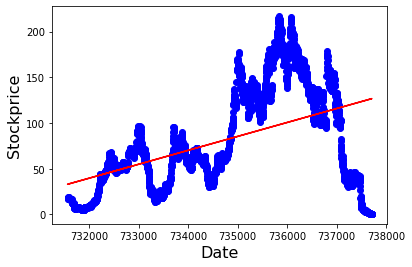

In [12]:
#%matplotlib inline
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(train_date,train_close,color='blue')
plt.plot(train_date,regObj.predict(train[['Date']]),color='red')